In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [28]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w22_x * neuron(w12_x, x, w12_b) + w2_b)


def func(x):
    return np.sin(x)


def loss(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w11_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w11_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)
    return l    

def loss_deriv_w12_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w12_x * neuron_der_w(w12_x, item, w12_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)
    return l    

    
def loss_deriv_w21_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)
    return l    


def loss_deriv_w22_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w22_x * neuron_der_w(w12_x, item, w12_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)
    return l    


def loss_deriv_w11_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)

    
def loss_deriv_w12_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w22_x * neuron_der_b(w12_x, item, w12_b)
        l = l + sq
    print "Loss_derivv_w21_x = " + str(l)
    return l    
    


In [29]:
epochs = 1000
step_tanh_w_x = 0.25
step_tanh_w_b = 0.05
step_lin_w_x = 0.25
step_lin_w_b = 0.05
x = np.arange(0, math.pi, 0.05)
print x
y = func(x)
print y

w11_x = uniform(0, 1)
w11_b = uniform(0, 1)

w12_x = uniform(0, 1)
w12_b = uniform(0, 1)

w21_x = uniform(0, 1)
w22_x = uniform(0, 1)

w2_b  = uniform(0, 1)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1 ]
[ 0.          0.04997917  0.09983342  0.14943813  0.19866933  0.24740396
  0.29552021  0.34289781  0.38941834  0.43496553  0.47942554  0.52268723
  0.56464247  0.60518641  0.64421769  0.68163876  0.71735609  0.75128041
  0.78332691  0.8134155   0.84147098  0.86742323  0.89120736  0.91276394
  0.93203909  0.94898462  0.96355819  0.97572336  0.98544973  0.99271299
  0.99749499  0.99978376  0.9995736   0.99686503  0.99166481  0.98398595
  0.97384763  0.9612752   0.94630009  0.92895972  0.90929743  0.88736237
  0.86320937  0.83689879  0.8084964   0.7780732   0.74570521  0.71147335
  0.67546318  0.6377647   0.598

<IPython.core.display.Javascript object>


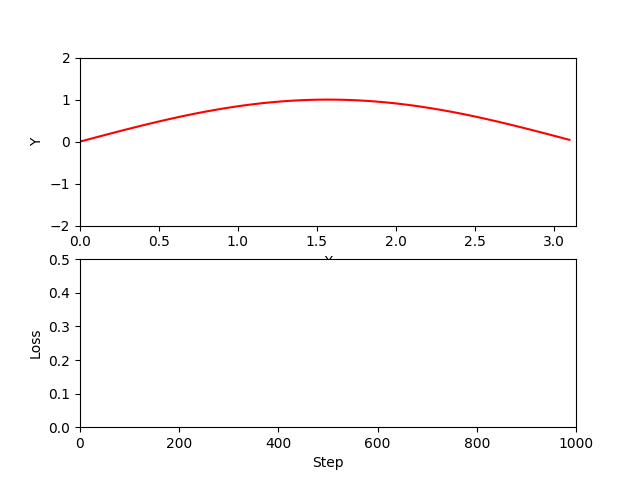

(0, 0.5)

In [30]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, math.pi)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("X")
ax1.plot(x, y, color = 'r')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 0.5)



In [33]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    print "Loss = " + str(l)
    ax2.scatter(i, l, color = 'r', s=5)
    
    x1 = neuron(w11_x, x, w11_b)
    w21_new = w21_x - step_lin_w_x * loss_deriv_w21_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)

    x2 = neuron(w12_x, x, w12_b)
    w22_new = w22_x - step_lin_w_x * loss_deriv_w22_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)

    w2_b_new = w2_b - step_lin_w_b * loss_deriv_w2_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)

    w11_x_new = w11_x - step_lin_w_x * loss_deriv_w11_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    w12_x_new = w12_x - step_lin_w_x * loss_deriv_w12_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    w11_b_new = w11_b - step_lin_w_b * loss_deriv_w11_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    w12_b_new = w12_b - step_lin_w_b * loss_deriv_w12_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        
    w21_x = w_21_new
    w22_x = w22_new
    w2_b = w2_b_new
    
    w11_x = w11_new
    w12_x = w22_new
    w11_b = w11_b_new
    w12_b = w12_b_new
    
    z = pred(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ax1.clear()
    print x
    print y
    ax1.plot(x, y, color = 'r')
    ax1.plot(x, z, color = 'b')
    
    fig.canvas.draw()
    


Loss = 31.6661827594
Loss = 31.6661827594
Loss_derivv_w21_x = 11.8233339716
Loss_derivv_w21_x = 114.760991447
Loss_deriv_w2_b = 80.9584376148
Loss_derivv_w21_x = 15.5070530025
Loss_derivv_w21_x = 6.26617820491
Loss_derivv_w21_x = 15.1662532858


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'